In [90]:
import pandas as pd
import os
HOUSING_PATH = r"C:\Users\dell\Downloads\archive"
def load_housing_data(housing_path=HOUSING_PATH):
     csv_path = os.path.join(housing_path, "housing.csv")
     return pd.read_csv(csv_path)


In [91]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### In the above sample dataset you see 5 sample in which each row represent one district

In [92]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### so you can see here <U>20640</u> instances in the dataset 
**also total_bedrooms attribute  have only <u>20433</u> non null values meaning that <u>207 </u> districts are missing this features** 

In [93]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [94]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


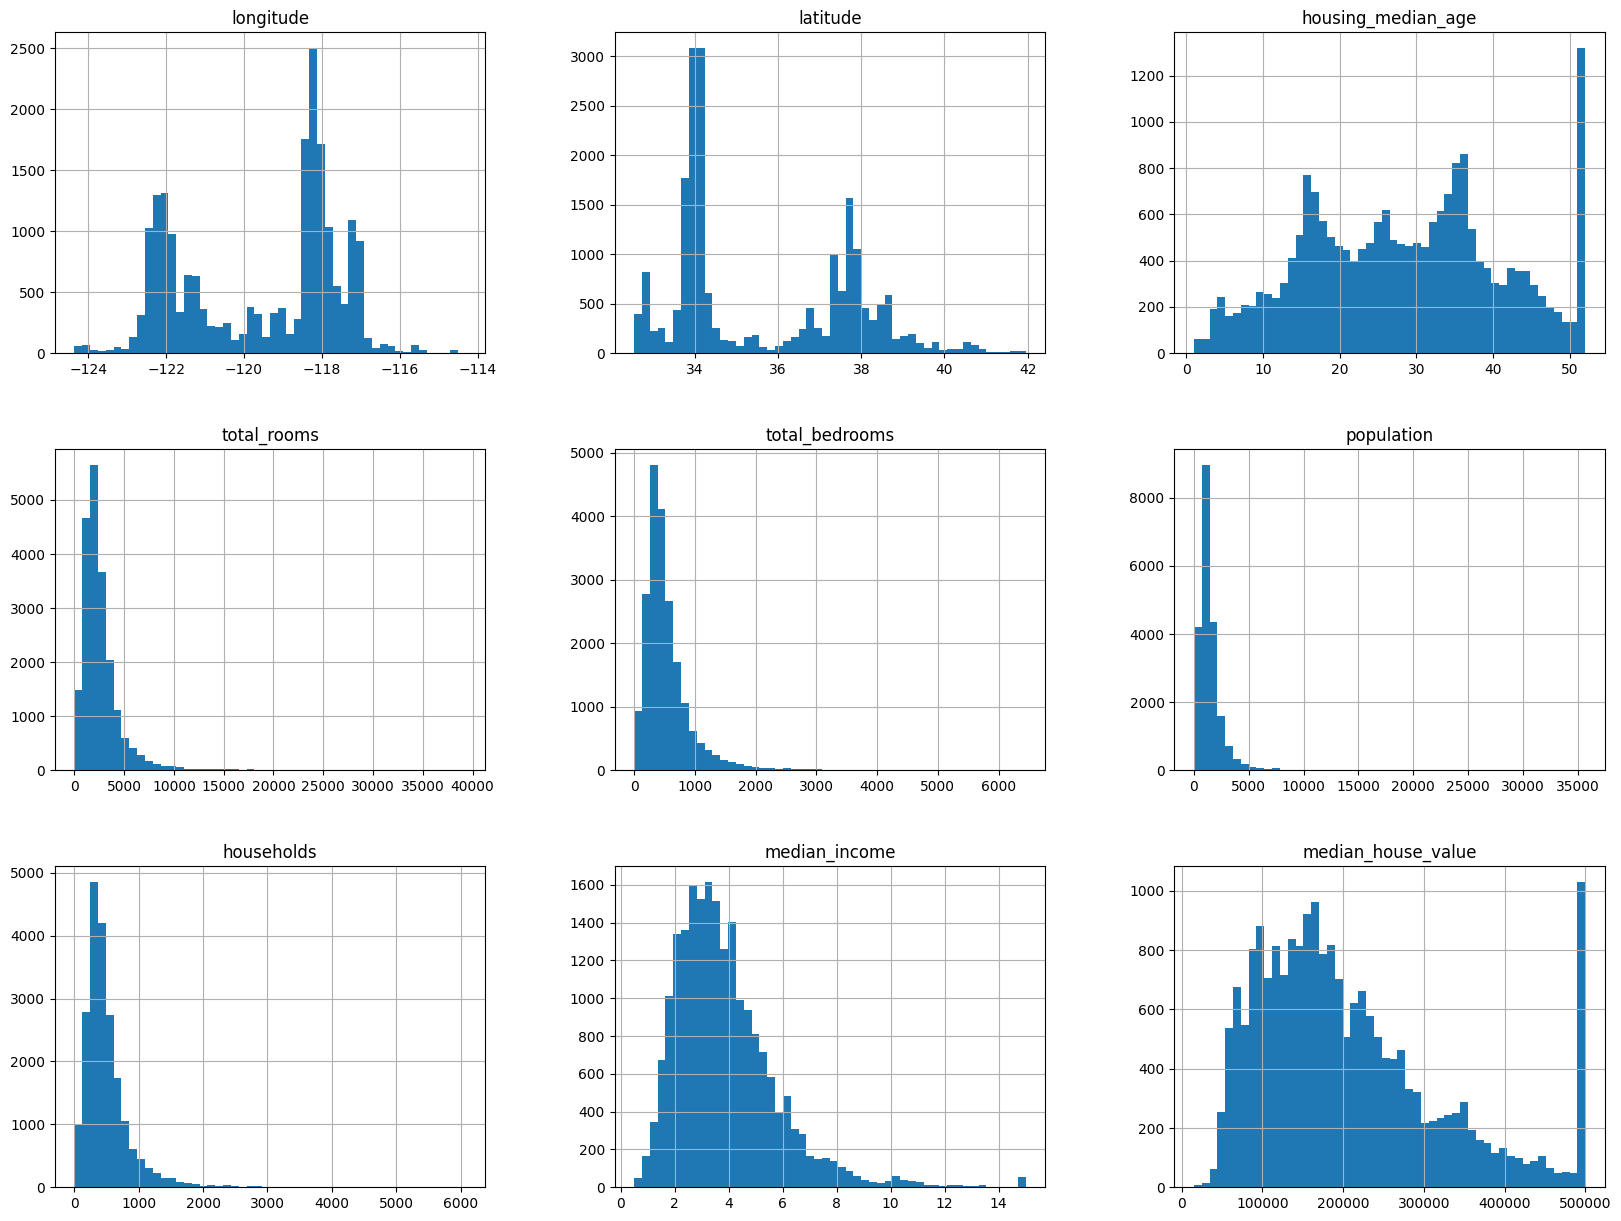

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

**<u>Median Income</u>**: Capped at 15 (or 15.0001) for higher median incomes and at 0.5 (or 0.4999) for lower median incomes.

**<u>Housing Median Age</u>**: The exact cap value isn't specified, but it's mentioned that this attribute is capped.

**<u>Median House Value</u>**: The exact cap value isn't specified, but it's visualize in histogram  that this attribute is capped. If predictions beyond $500,000 are needed, this capping could be problematic.

## then there will be two options which we can follow

a. Collect proper labels for the districts whose labels were capped.

b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).

In [96]:
import numpy as np

In [97]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [98]:
len(train_set)

16512

In [99]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

<Axes: >

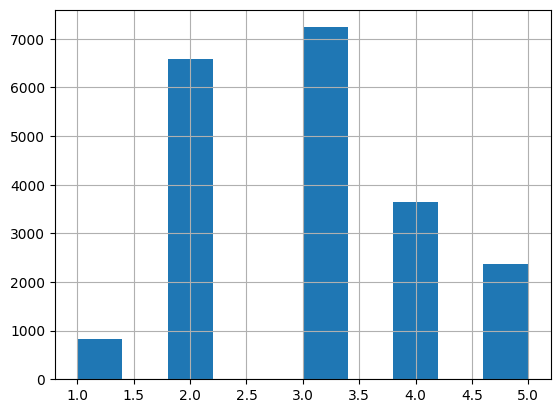

In [100]:
housing["income_cat"].hist()


## Create Stratified Train and Test Sets

In [101]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

## Check Proportions in the Stratified Test Set

In [102]:
# Check the proportions in the stratified test set
strat_test_proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
print(strat_test_proportions)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


## Compare with Full Dataset Proportions

In [103]:
# Check the proportions in the full dataset
full_data_proportions = housing["income_cat"].value_counts() / len(housing)
print(full_data_proportions)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


## Generate a Random Test Set and Compare Proportions

In [104]:
# Create a random test set
random_test_set = housing.sample(frac=0.2, random_state=42)

# Check the proportions in the random test set
random_test_proportions = random_test_set["income_cat"].value_counts() / len(random_test_set)
print(random_test_proportions)


income_cat
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64


##  Compare Proportions

In [105]:
comparison = pd.DataFrame({
    "Overall": full_data_proportions,
    "Stratified": strat_test_proportions,
    "Random": random_test_proportions
}).sort_index()

print(comparison)


             Overall  Stratified    Random
income_cat                                
1           0.039826    0.039971  0.040213
2           0.318847    0.318798  0.324370
3           0.350581    0.350533  0.358527
4           0.176308    0.176357  0.167393
5           0.114438    0.114341  0.109496


## remove the income_cat attribute so the data is back to its original mmstate:

In [106]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

#### geographical information (latitude and longitude),

In [107]:
housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

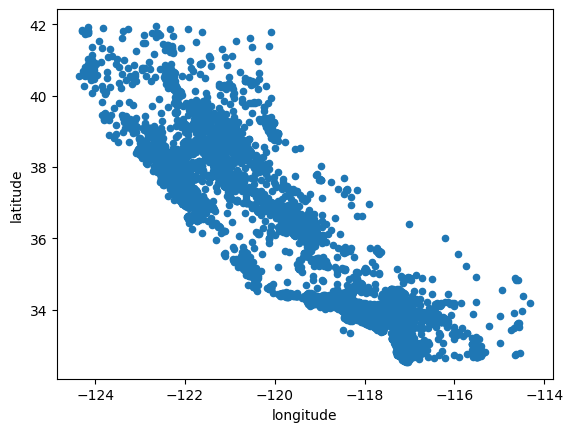

In [108]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [109]:
## here it hard to understand pattern so we adjust alpha so any data points which is overlap become tranparent 

<Axes: xlabel='longitude', ylabel='latitude'>

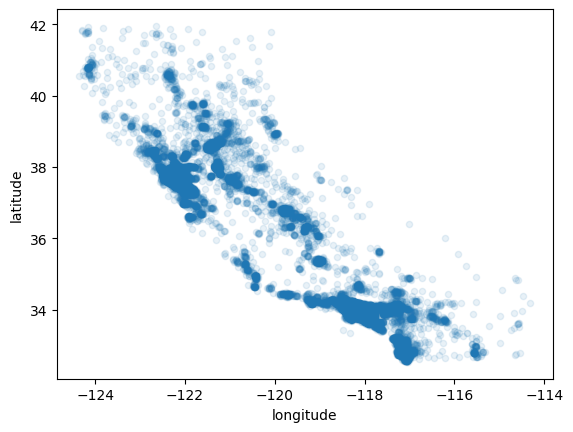

In [110]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


####  housing prices

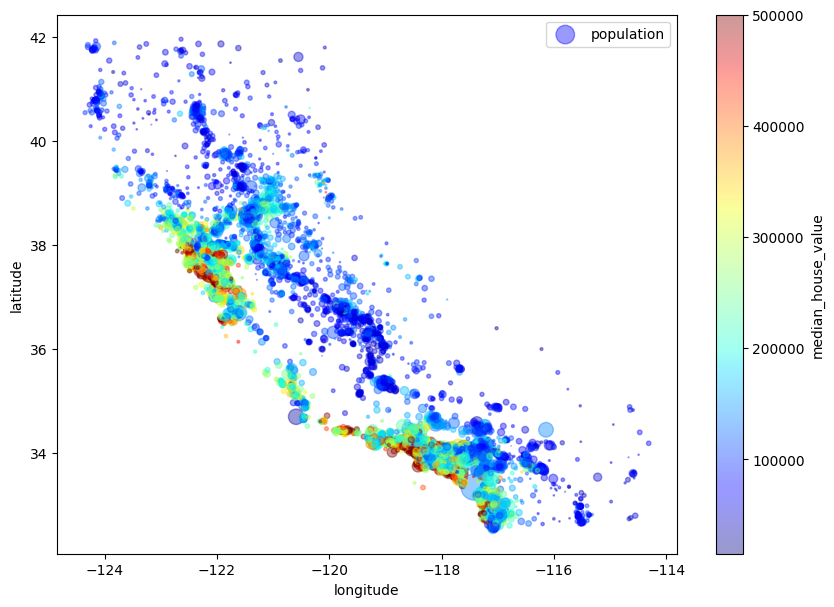

In [111]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


#### <u>This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density</u>

#### using clustering alorithm 

In [112]:
from sklearn.cluster import KMeans
import numpy as np

# Standardize longitude and latitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing[["longitude", "latitude"]])

#KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
housing["cluster"] = kmeans.fit_predict(housing_scaled)

# Calculate the distance to cluster centers
housing["cluster_center_dist"] = np.min(kmeans.transform(housing_scaled), axis=1)


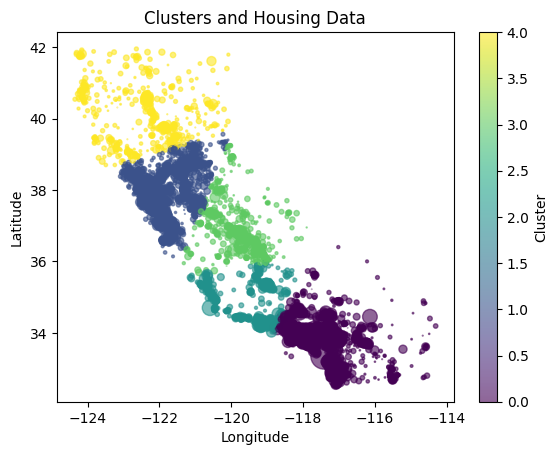

In [113]:
plt.scatter(housing["longitude"], housing["latitude"], c=housing["cluster"], cmap="viridis", alpha=0.6, s=housing["population"] / 100)
plt.colorbar(label='Cluster')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters and Housing Data")
plt.show()


In [114]:
corr_matrix = housing.select_dtypes(exclude=['object']).corr()


In [115]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,cluster_center_dist
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.590997,0.020289
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.696095,0.123441
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.109039,-0.183177
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,-0.062556,0.005389
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,-0.089736,0.009108
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.115092,-0.060585
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.104195,-0.037095
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,-0.172300,-0.173737
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,-0.279956,-0.218311
cluster,-0.590997,0.696095,-0.109039,-0.062556,-0.089736,-0.115092,-0.104195,-0.172300,-0.279956,1.000000,0.209290


**<U>The correlation coefficient ranges from –1 to 1.</u>**

**<U>The correlation coefficient close to 1 means strong postive .</u>**

**<U>The correlation coefficient close to - strong negative correlation.</u>**



### Another way to check for correlation between attributes is to use Pandas’<u>
scatter_matrix functio</u>n


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

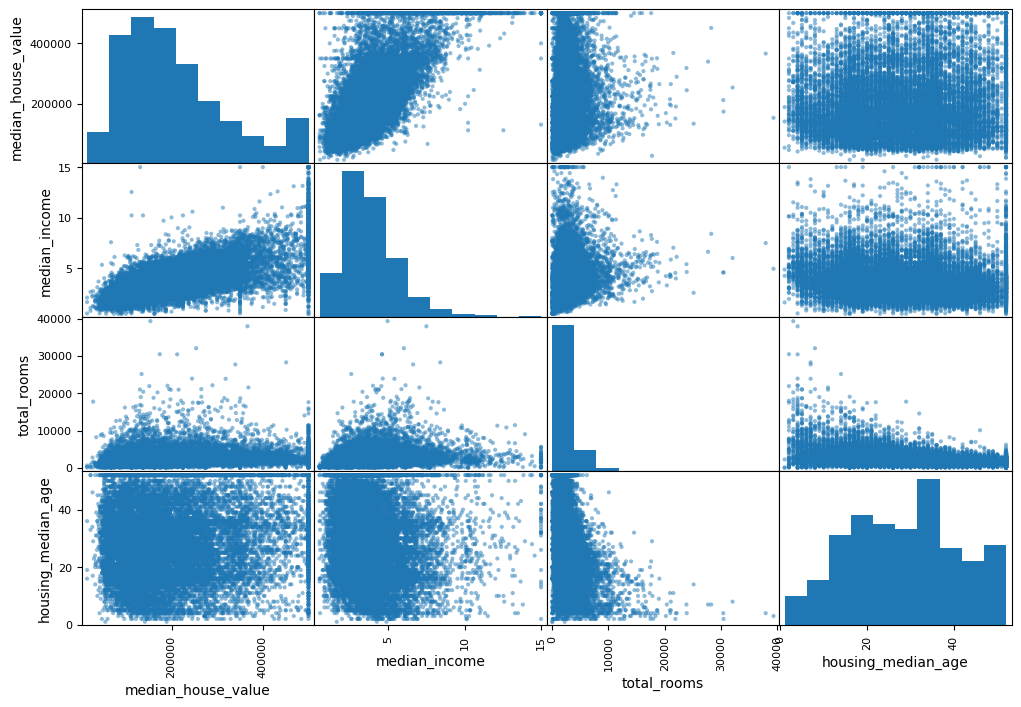

In [116]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


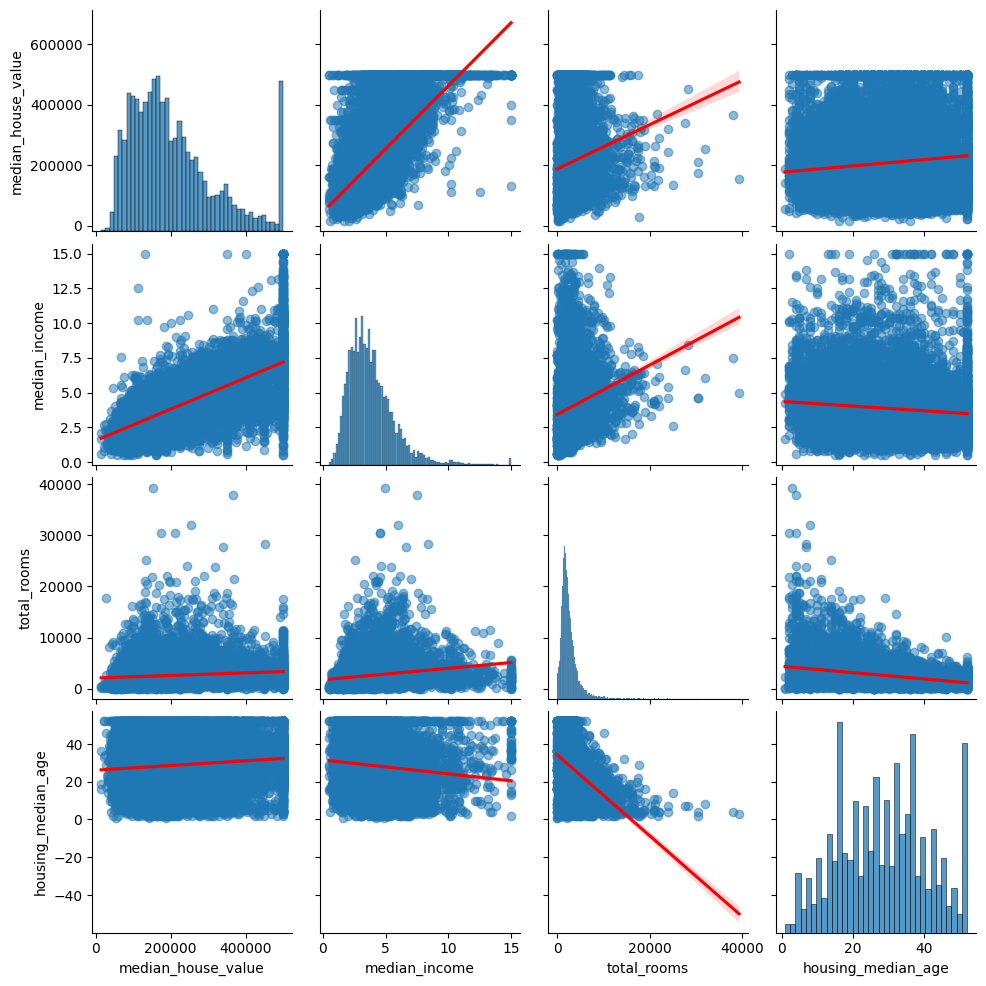

In [117]:
import seaborn as sns 
import matplotlib.pyplot as plt
# Create a pair plot with regression lines
sns.pairplot(housing[attributes], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()

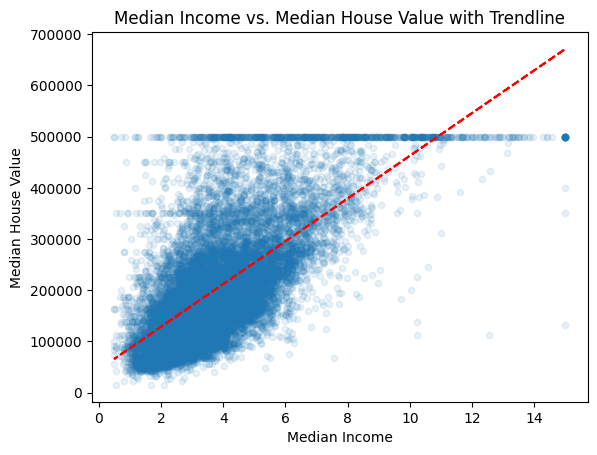

In [118]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Compute the trendline
x = housing["median_income"]
y = housing["median_house_value"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trendline
plt.plot(x, p(x), "r--")

# Show plot with trendline
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs. Median House Value with Trendline")
plt.show()

### Attribute Combinations

#### for those with high correlation between them because we have to reduce dimensionality

###### those with high correlation are household and

1.Total Rooms and Total Bedrooms: Correlation = 0.929

2.Total Rooms and Households: Correlation = 0.918

3.Total Bedrooms and Households: Correlation = 0.980

4.Population and Households: Correlation = 0.904

In [119]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [120]:
corr_matrix = housing.select_dtypes(exclude=['object']).corr()


In [121]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,cluster_center_dist,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.590997,0.020289,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.696095,0.123441,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.109039,-0.183177,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,-0.062556,0.005389,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,-0.089736,0.009108,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.115092,-0.060585,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.104195,-0.037095,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,-0.172300,-0.173737,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,-0.279956,-0.218311,0.146255,-0.259952,-0.021991
cluster,-0.590997,0.696095,-0.109039,-0.062556,-0.089736,-0.115092,-0.104195,-0.172300,-0.279956,1.000000,0.209290,0.118609,-0.094795,0.008872


In [122]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
cluster_center_dist        -0.218311
bedrooms_per_room          -0.259952
cluster                    -0.279956
Name: median_house_value, dtype: float64

<u>not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.</u>

## Prepare the Data for Machine Learning Algorithms

In [123]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

In [124]:
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_14692\2372814630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


### Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

In [125]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [126]:
housing_cat = housing[["ocean_proximity"]]


In [127]:
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [128]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

### list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute

In [129]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### in above representaion there will be an issue because ml algorithm think those labeld which is nearer are more similar than distant one 
#### create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), 

In [130]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [131]:
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# custome tranformer

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self # nothing else to do
     def transform(self, X, y=None):
             rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
             population_per_household = X[:, population_ix] / X[:, households_ix]
             if self.add_bedrooms_per_room:
                 bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                 return np.c_[X, rooms_per_household, population_per_household,
                 bedrooms_per_room]
             else:
                 return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


# Feature Scaling
### Transformation pipelines

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [134]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model


#### Training and Evaluating on the Training Set

In [135]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [136]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [137]:
print("Labels:", list(some_labels))


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [138]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

### this is better than nothing but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying

<u>This is an example of a model underfitting the training data</u>

**selecting more strong mode to overcome underfitting**

In [139]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [140]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### no error this is impossible we need to check 

**<u>Better Evaluation Using Cross-Validation</u>**

#### Scikit-Learn’s K-fold cross-validation feature

In [141]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [142]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [71799.54058942 71619.75325605 70325.95818897 72310.04054891
 70440.81578577 77996.11570526 70293.68355485 72945.33350803
 68842.13866964 69586.95863037]
Mean: 71616.0338437258
Standard deviation: 2441.1779871087615


#### Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model!

#### <u>The Decision Tree has a score of approximately 71,407, generally ±2,439.</u>

In [143]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)

In [144]:
lin_rmse_scores = np.sqrt(-lin_scores)


In [145]:
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


#####  the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model

## RandomForestRegressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)


In [148]:
forest_rmse

18677.421672711047

##### <u>this is much better: Random Forests look very promising.</u>

# save this model

In [153]:
pip install joblib


In [155]:
import joblib

# Save the model
joblib.dump(forest_reg, "forest_reg.pkl")

# Load the model
forest_reg_loaded = joblib.load("forest_reg.pkl")
